# Workflow Stages

The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. **Question or Problem Definition**: Define the problem or question to be answered using the provided data.

2. **Acquire Training and Testing Data**: Gather the necessary data for model development and evaluation.

3. **Wrangle, Prepare, Cleanse the Data**: Process and clean the data, handling missing values and outliers.

4. **Analyze, Identify Patterns, and Explore the Data**: Explore the dataset to understand patterns and relationships.

5. **Model, Predict, and Solve the Problem**: Develop predictive models based on the prepared data.

6. **Visualize, Report, and Present the Problem Solving Steps and Final Solution**: Create visualizations and reports to communicate findings.

7. **Supply or Submit the Results**: If it's a competition, submit the model's predictions.

The workflow may involve combining stages, executing them out of sequence, repeating stages as needed, or omitting stages that don't apply.

## Question and Problem Definition

Define the problem or question to be solved using the provided data. For example, in the Titanic Survival competition, the goal is to predict whether a passenger survived.

## Workflow Goals

The workflow aims to achieve seven major goals:

1. **Classifying**: Categorize or classify samples and understand class correlations with the solution goal.

2. **Correlating**: Identify significant feature correlations and explore how they relate to the solution.

3. **Converting**: Convert non-numeric data to numerical format for modeling.

4. **Completing**: Fill in missing values to ensure the dataset is complete.

5. **Correcting**: Detect and correct errors or outliers.

6. **Creating**: Generate new features based on existing ones.

7. **Charting**: Use appropriate visualizations to present the data effectively.


In [289]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Acquire Data

To work with our datasets, we'll use the Python Pandas package. We'll begin by acquiring the training and testing datasets into Pandas DataFrames. Additionally, we'll combine these datasets to perform certain operations on both datasets simultaneously.


In [290]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## Analyze by Describing Data

Pandas provides valuable tools for describing datasets, allowing us to answer key questions early in our project.


In [291]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Feature Categories

Which features are categorical?

- **Categorical**: Survived, Sex, and Embarked.
- **Ordinal**: Pclass.

Which features are numerical?

- **Continuous**: Age, Fare.
- **Discrete**: SibSp, Parch.


In [292]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Mixed Data Types and Potential Errors

Which features are mixed data types?

- Numerical and alphanumeric data within the same feature. These are candidates for the correction goal.
- **Mixed**: Ticket (mix of numeric and alphanumeric), Cabin (alphanumeric).

Which features may contain errors or typos?

It can be challenging to review a large dataset for errors, but examining a few samples from a smaller dataset may reveal potential issues.

- **Name**: The Name feature may contain errors or typos due to variations in name descriptions, titles, round brackets, and quotes used for alternative or short names.


In [293]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Missing Values and Data Types

Which features contain blank, null, or empty values?

- These features will require correction.
- For the training dataset: Cabin > Age > Embarked features contain null values in that order.
- For the test dataset: Cabin > Age are incomplete.

What are the data types for various features?

- Knowing the data types is helpful for the conversion goal.
- Seven features are integer or floats in the training dataset. Six in the test dataset.
- Five features are strings (object).


In [294]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

## Distribution of Numerical Feature Values

### What is the distribution of numerical feature values across the samples?

This analysis helps us understand how representative the training dataset is of the actual problem domain.

- There are a total of 891 samples, which represent approximately 40% of the actual number of passengers on board the Titanic (2,224).
- The "Survived" feature is categorical with values 0 or 1.
- Approximately 38% of the samples survived, which is representative of the actual survival rate of 32%.
- Most passengers (>75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or a spouse aboard.
- Fares varied significantly, with a few passengers (<1%) paying as high as $512.
- There were few elderly passengers (<1%) within the age range of 65-80.


In [295]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Distribution of Categorical Features

What is the distribution of categorical features?

- Names are unique across the dataset (count=unique=891).
- The "Sex" variable has two possible values, with 65% male (top=male, freq=577/count=891).
- "Cabin" values have several duplicates across samples, indicating that several passengers shared a cabin.
- "Embarked" takes three possible values, with the "S" port being used by most passengers (top=S).
- The "Ticket" feature has a high ratio (22%) of duplicate values (unique=681).


In [296]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Assumptions Based on Data Analysis

Here are our assumptions based on data analysis:

### Correlation

- We'll check how each feature relates to survival, both initially and with modeled correlations later.

### Completion

- We may need to fill missing values for "Age" and "Embarked" since they could affect survival.

### Correction

- We might drop "Ticket" due to many duplicates, "Cabin" for being incomplete, and "PassengerId" and "Name" for limited relevance.

### New Features

- We'll create a "Family" feature based on "Parch" and "SibSp".
- Extracting "Title" from "Name" could be useful.
- We'll categorize "Age" into bands and potentially create a "Fare range" feature.

### Classification

- We assume women, children, and upper-class passengers were more likely to survive.


## Feature Analysis by Pivoting

We'll check feature correlations by pivoting them against each other. This analysis applies to features without empty values and includes only categorical (Sex), ordinal (Pclass), or discrete (SibSp, Parch) types.

### Pclass

There's a significant correlation (>0.5) between Pclass=1 and Survival (classifying #3). We'll include this feature in our model.

### Sex

Confirming our initial observation, females (Sex=female) had a high survival rate of 74% (classifying #1).

### SibSp and Parch

These features have zero correlation for some values. We might create new features from them (creating #1).


In [297]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [298]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [299]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [300]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyzing Data with Visuals

Now, let's visually confirm some of our assumptions and explore correlations between numerical features and our survival prediction.

### Correlations in Numerical Features

We'll start by looking at how numerical features relate to survival.

#### Insights

- Infants (Age <= 4) had high survival rates.
- The oldest passengers (Age = 80) survived.
- Many 15-25-year-olds did not survive.
- Most passengers are aged 15-35.

#### Decisions

Based on these findings:

- We should use Age in our model (our assumption #2).
- Fill in missing Age values (step #1).
- Group ages into categories (step #3).


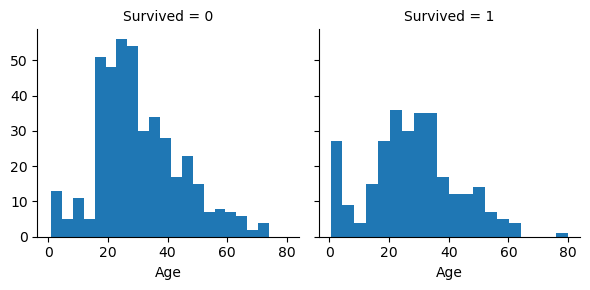

In [301]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

## Analyzing Correlations

- **Pclass=3** had the most passengers, but most didn't survive, confirming our assumption #2.
- Infants in **Pclass=2** and **Pclass=3** mostly survived, supporting assumption #2.
- Most **Pclass=1** passengers survived, confirming assumption #3.
- Pclass relates to passengers' age distribution.

**Decision**: Consider **Pclass** for model training.

This analysis highlights correlations between passenger class and survival rates.


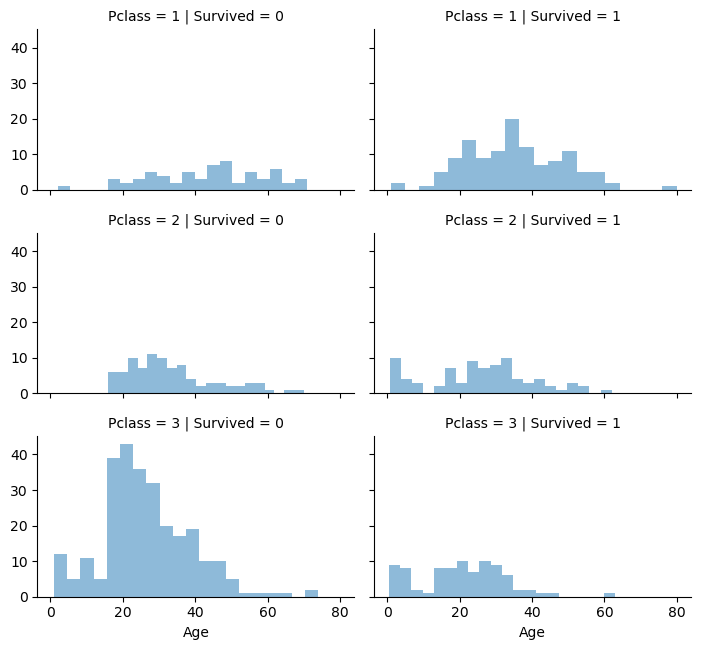

In [302]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Correlating Categorical Features

Now, let's examine the correlation between categorical features and our solution goal.

## Observations

Here are some observations:

- Female passengers had a significantly higher survival rate than males, which confirms our classification goal (#1).

- There is an exception in Embarked=C, where males had a higher survival rate. This exception could be due to a correlation between Pclass and Embarked, and in turn, Pclass and Survived. It might not be a direct correlation between Embarked and Survived.

- Among male passengers, the survival rate for Pclass=3 was better when compared to Pclass=2 for C and Q ports, which is relevant for completing our goals (#2).

- The ports of embarkation exhibit varying survival rates, especially for Pclass=3 and among male passengers, highlighting the correlation between these features.

## Decisions

Based on these observations, we can make the following decisions:

- Add the `Sex` feature to our model training since it correlates significantly with survival.

- Complete and include the `Embarked` feature in our model training as it also shows correlation with survival.

This analysis helps us make informed decisions for our modeling process.


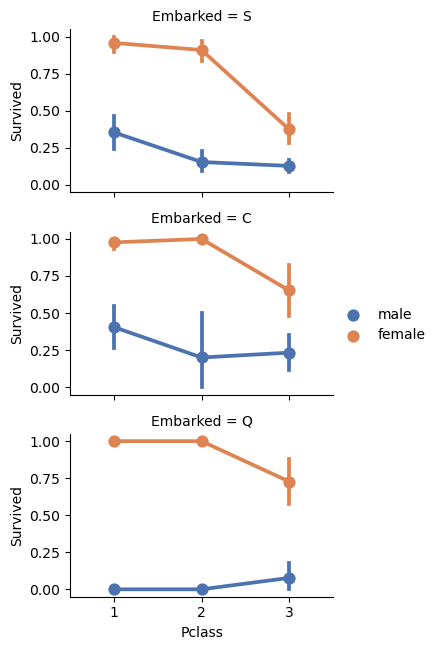

In [303]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1, 2, 3], hue_order=['male', 'female'])
grid.add_legend()


## Correlating Categorical and Numerical Features

In our analysis, we may also want to explore the correlation between categorical features (with non-numeric values) and numerical features. Specifically, we can examine the correlation among the following:

- **Embarked** (Categorical non-numeric)
- **Sex** (Categorical non-numeric)
- **Fare** (Numeric continuous)
- **Survived** (Categorical numeric)

Key Observations:

1. Higher fare-paying passengers tend to have a better chance of survival. This observation confirms our assumption for creating fare ranges (#4).

2. The port of embarkation appears to correlate with survival rates. This supports our findings related to correlating (#1) and completing (#2) the data.

Decisions:

Considering these observations, it may be beneficial to band the Fare feature into ranges for further analysis and modeling.


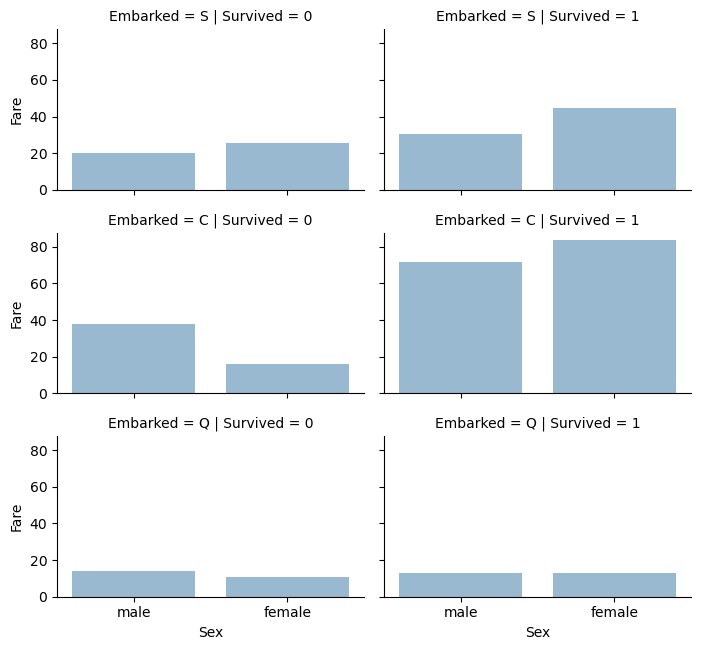

In [304]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, errorbar=None, order=['male', 'female'])
grid.add_legend()

# Wrangle Data

In this stage, we will execute several assumptions and decisions regarding our datasets and solution requirements. So far, we have not made any changes to features or values. Now, it's time to implement our decisions for correcting, creating, and completing our goals.

## Correcting by Dropping Features

Our first goal is to correct the data by dropping unnecessary features. This simplifies our dataset, speeds up our notebook, and eases the analysis process.

Based on our assumptions and decisions, we will drop the following features:

1. Cabin (for correction, as per decision #2)
2. Ticket (for correction, as per decision #1)

We will apply these operations to both the training and testing datasets to maintain consistency.


In [305]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

# Creating New Feature by Extracting from Existing

In this section, we aim to analyze whether the "Name" feature can be engineered to extract titles and test the correlation between titles and survival. We'll do this before dropping the "Name" and "PassengerId" features.

In the following code snippet, we extract the "Title" feature using regular expressions. The RegEx pattern `(\w+\.)` matches the first word ending with a dot character within the "Name" feature. We set the `expand=False` flag to return a DataFrame.

**Observations:**

When we plot "Title," "Age," and "Survived," we make the following observations:

- Most titles accurately band Age groups. For example, the "Master" title has an Age mean of 5 years.
- Survival rates among Title Age bands vary slightly.
- Certain titles mostly survived (e.g., "Mme," "Lady," "Sir") or did not (e.g., "Don," "Rev," "Jonkheer").

**Decision:**

Based on our observations, we decide to retain the newly created "Title" feature for model training.


In [306]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as Rare.

In [307]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

In [308]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [309]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

## Converting a Categorical Feature

In this step, we'll convert features that contain strings into numerical values. This conversion is necessary for most model algorithms and will also assist us in achieving the goal of feature completion.

Let's begin by converting the "Sex" feature to a new feature called "Gender," where "female" is represented as 1 and "male" as 0.


In [310]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## Completing a Numerical Continuous Feature

Now, let's address the task of estimating and completing features with missing or null values, starting with the "Age" feature.

We have several methods to consider for completing a numerical continuous feature:

1. **Random Numbers**: A simple approach is to generate random numbers within the range of the mean and standard deviation of the feature.

2. **Correlated Features**: A more accurate method involves using correlated features. In our case, we observe a correlation among "Age," "Gender," and "Pclass." We can guess "Age" values by taking the median age for specific combinations of "Pclass" and "Gender" features. For example, the median age for "Pclass=1" and "Gender=0," "Pclass=1" and "Gender=1," and so on.

3. **Combining Methods**: An alternative approach combines methods 1 and 3. Instead of guessing "Age" values based on medians, we use random numbers within the range defined by the mean and standard deviation, but still consider the sets of "Pclass" and "Gender" combinations.

It's important to note that methods 1 and 3 introduce random noise into our models, and the results may vary across multiple executions. Therefore, we prefer method 2 as it leverages correlated features for a more accurate estimation.


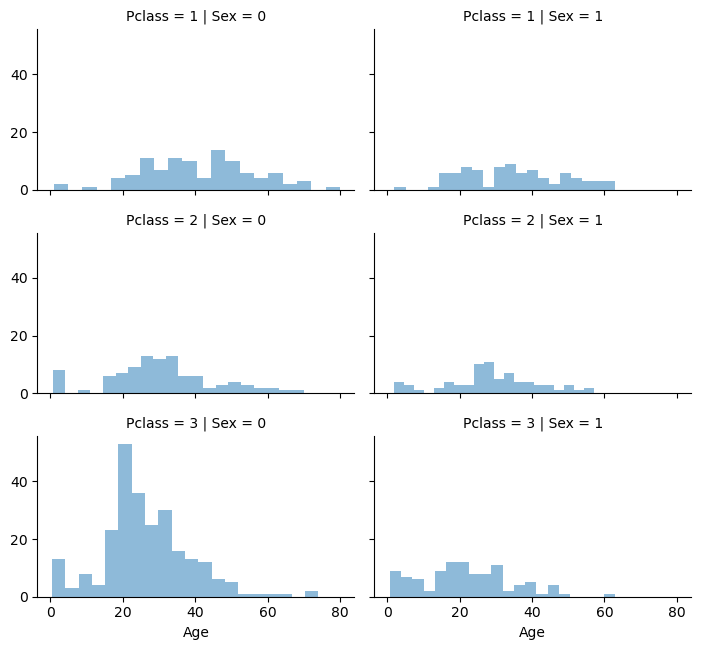

In [311]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations

In [312]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [313]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [314]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [315]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [316]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [317]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [318]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [319]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [320]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [321]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [322]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [323]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


# Quick Completion and Converting a Numeric Feature

In this section, we'll swiftly complete the 'Fare' feature, which has a single missing value in the test dataset. We will achieve this by using the mode of the feature, which represents the value that occurs most frequently.

We perform this task in just a single line of code, as it involves replacing only a single missing value. The completion goal is to provide the necessary non-null values for the model algorithm to operate effectively.

Additionally, it's a good practice to round off the fare to two decimal places since it represents currency.


In [324]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can not create Fare Band.

In [325]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the Fare Band.

In [326]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


Some ML methods require data to be normalized or standatrized. Performing normalization.

In [327]:
max_values = train_df.max()
train_df = train_df.divide(max_values)

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0.0,1.000000,0.0,0.0125,0.000000,0.0,0.2,0.0,0.013514
1,1.0,0.333333,1.0,0.0250,1.000000,0.5,0.6,0.0,0.009009
2,1.0,1.000000,1.0,0.0125,0.333333,0.0,0.4,1.0,0.013514
3,1.0,0.333333,1.0,0.0250,1.000000,0.0,0.6,0.0,0.009009
4,0.0,1.000000,0.0,0.0250,0.333333,0.0,0.2,1.0,0.027027
5,0.0,1.000000,0.0,0.0125,0.333333,1.0,0.2,1.0,0.013514
6,0.0,0.333333,0.0,0.0375,1.000000,0.0,0.2,1.0,0.013514
7,0.0,1.000000,0.0,0.0000,0.666667,0.0,0.8,0.0,0.000000
8,1.0,1.000000,1.0,0.0125,0.333333,0.0,0.6,0.0,0.013514
9,1.0,0.666667,1.0,0.0000,0.666667,0.5,0.6,0.0,0.000000


And the test dataset

In [328]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# Model, Predict, and Solve

Now, we are ready to train a model and predict the required solution. There are over 60 predictive modeling algorithms to choose from. To select the right model, we need to understand the problem type and solution requirements. In our case, the problem involves both classification and regression. We aim to establish a relationship between the output (Survived or not) and other variables or features (such as Gender, Age, Port...). Additionally, we are engaged in supervised learning, as we train our model using a given dataset.

Given these criteria—Supervised Learning and Classification/Regression—our choice of models narrows down to a select few. These models include:

1. **Logistic Regression**
2. **k-Nearest Neighbors (KNN)**
3. **Support Vector Machines**
4. **Naive Bayes Classifier**
5. **Decision Tree**
6. **Random Forest**
7. **Perceptron**
8. **Artificial Neural Network**
9. **Relevance Vector Machine (RVM)**

These models are candidates for solving our problem. We will evaluate and select the most suitable one for our specific task.


In [329]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [330]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.79

We can use Logistic Regression to validate our assumptions and decisions for feature creation and completion goals. This can be done by calculating the coefficients of the features in the decision function.

- Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- The **Sex** feature has the highest positive coefficient, implying that as the **Sex** value increases (male: 0 to female: 1), the probability of **Survived=1** increases the most.

- Inversely, as **Pclass** increases, the probability of **Survived=1** decreases the most.

- **Age*Class** is a good artificial feature to model as it has the second-highest negative correlation with **Survived**.

- Similarly, **Title** has the second-highest positive correlation.

These insights from Logistic Regression coefficients help us understand how different features affect the likelihood of survival in our model.


In [331]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.173457
5,Title,1.689525
4,Embarked,0.580692
3,Fare,0.117754
6,IsAlone,0.084945
7,Age*Class,-0.607824
2,Age,-0.871639
0,Pclass,-2.528590


## Modeling with Support Vector Machines

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.



In [332]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.72

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

KNN confidence score is better than Logistics Regression but worse than SVM.

In [333]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.16

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [334]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [335]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [336]:
# Linear SVC

linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.23

In [337]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.57

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [338]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [339]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

# Model Evaluation

Now, let's rank our evaluation of all the models to select the best one for our problem. Although both the Decision Tree and Random Forest models have the same score, we opt to use Random Forest. This choice is due to Random Forest's ability to mitigate the tendency of decision trees to overfit their training data.


In [340]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,83.16
0,Support Vector Machines,82.72
6,Stochastic Gradient Decent,79.57
2,Logistic Regression,78.79
5,Perceptron,78.34
7,Linear SVC,78.23
4,Naive Bayes,72.28
